In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rn
import seaborn as sns

In [76]:
mall_customer = 'Mall_Customers.csv'
data = pd.read_csv(mall_customer)
print(data)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [77]:
# data = np.array(data) # chuyển dữ liệu sang dạng numpy array
# data = np.delete(data, 0, 1) # delete customer id
# print(data[5])

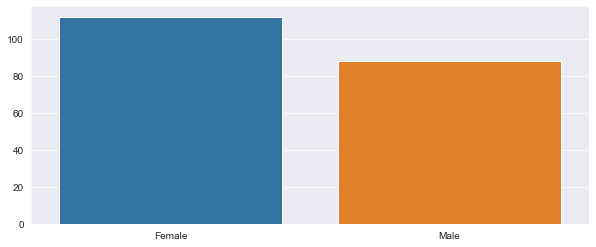

In [78]:
#Bieu đồ thể hiện giới tính 
genders = data.Gender.value_counts()
# sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

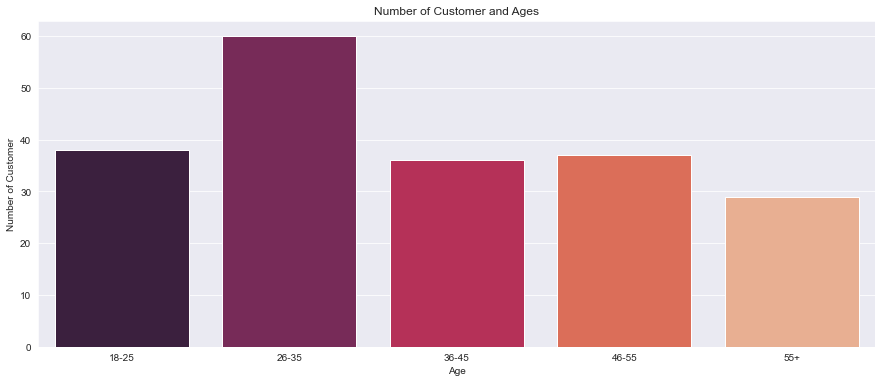

In [79]:
# Biểu đồ phân bổ khách theo mức tuổi
age18_25 = data.Age[(data.Age <= 25) & (data.Age >= 18)]
age26_35 = data.Age[(data.Age <= 35) & (data.Age >= 26)]
age36_45 = data.Age[(data.Age <= 45) & (data.Age >= 36)]
age46_55 = data.Age[(data.Age <= 55) & (data.Age >= 46)]
age55above = data.Age[data.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

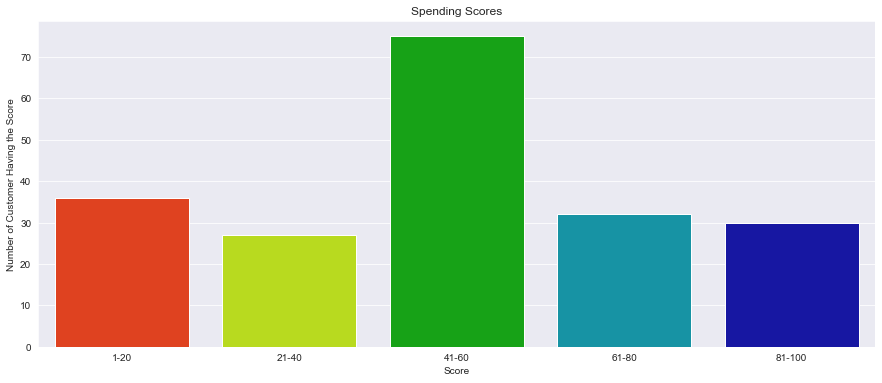

In [80]:
# Biểu đồ mối quan hệ giữa khách hàng và điểm tích luỹ
ss1_20 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 1) & (data["Spending Score (1-100)"] <= 20)]
ss21_40 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 21) & (data["Spending Score (1-100)"] <= 40)]
ss41_60 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 41) & (data["Spending Score (1-100)"] <= 60)]
ss61_80 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 61) & (data["Spending Score (1-100)"] <= 80)]
ss81_100 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 81) & (data["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

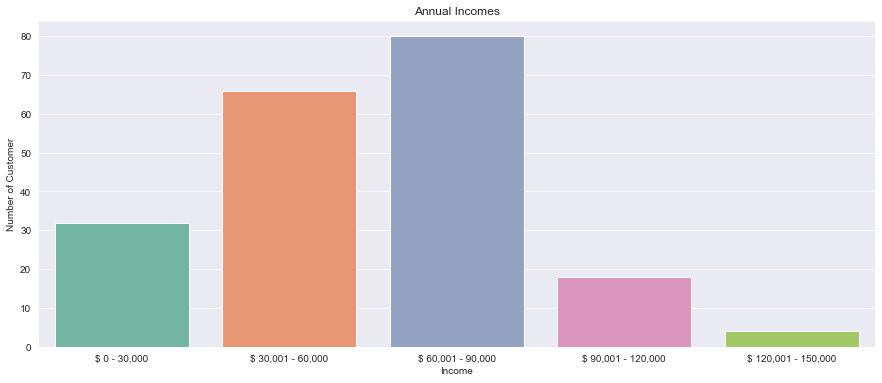

In [81]:
#Biểu đồ biểu thị mức thu nhập của số khách hàng.
ai0_30 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 0) & (data["Annual Income (k$)"] <= 30)]
ai31_60 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 31) & (data["Annual Income (k$)"] <= 60)]
ai61_90 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 61) & (data["Annual Income (k$)"] <= 90)]
ai91_120 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 91) & (data["Annual Income (k$)"] <= 120)]
ai121_150 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 121) & (data["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

In [82]:
data = np.array(data) # chuyển dữ liệu sang dạng numpy array
data = np.delete(data, 0, 1) # delete customer id
print(data[5])

['Female' 22 17 76]


In [83]:
def encode_gender(mydata):
    for i in range(len(mydata)):
        if mydata[i, 0] == 'Male':
            mydata[i, 0] = 1
        else:
            mydata[i, 0] = 0
    return mydata 

# encode gender
# 1 to Male
# 0 to Femal
data = encode_gender(data)
#print(data[:5, :])

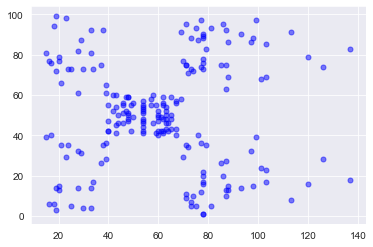

In [84]:
# visualize Annual income and Spending Score
def display_kmean(data):
    x = data[:, 2]
    y = data[:, 3] 
    plt.plot(x, y, 'bo', ms=5, alpha=0.5)
    plt.show()

display_kmean(data)

In [85]:
# lấy ra dữ liệu thu nhập hàng năm và chỉ số tiêu dùng
points = data[:, 1:4]

# initial k centroid
# Khởi tạo điểm dữ liệu trung tâm
def kmean_init_centroid(points, k):
    point = list(points[:, 1:3])
    return np.array(rn.sample(point, k))

centroids = kmean_init_centroid(points, 3)
print(centroids)

[[57 58]
 [54 54]
 [97 86]]


In [86]:
# chia dữ liệu thành các cụm
def devide_into_clusters(points, centroids):
    cluster = {}
    for i in range(len(centroids)):
        cluster[i] = []
    for value in points:
        # tính khoảng cách các điểm dữ liệu tới các điểm trung tâm
        distances = [np.linalg.norm(value[1:3] - centroid) for centroid in centroids]
        # phân điểm dữ liệu vào cụm
        clusterI = distances.index(min(distances))
        cluster[clusterI].append(list(value))
    return cluster

clusters = devide_into_clusters(points, centroids)
#print(clusters)

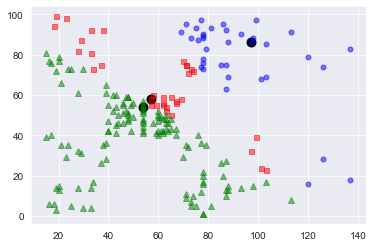

In [87]:
cluster1 = np.array(clusters[0])
cluster2 = np.array(clusters[1])
cluster3 = np.array(clusters[2])
plt.plot(cluster1[:, 1], cluster1[:, 2], 'rs', ms=5, alpha=.5)
plt.plot(cluster2[:, 1], cluster2[:, 2], 'g^', ms=6, alpha=.5)
plt.plot(cluster3[:, 1], cluster3[:, 2], 'bo', ms=5, alpha=.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=80)
plt.show()

In [88]:
# Update centroids
def update_centroids(clusters):
  # cập nhật lại điểm trung tâm
    centroids = np.array([list(np.mean(clusters[key], axis=0)) for key in clusters])
    centroids = centroids[:, 1:3]
    return centroids

centroids = update_centroids(clusters)
print(centroids)

[[58.79411765 65.23529412]
 [52.2        38.46153846]
 [92.41666667 78.38888889]]


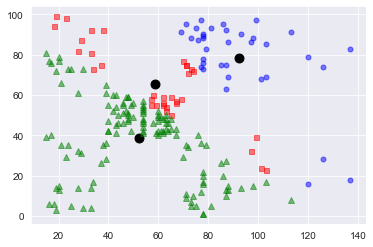

In [89]:
plt.plot(cluster1[:, 1], cluster1[:, 2], 'rs', ms=5, alpha=.5)
plt.plot(cluster2[:, 1], cluster2[:, 2], 'g^', ms=6, alpha=.5)
plt.plot(cluster3[:, 1], cluster3[:, 2], 'bo', ms=5, alpha=.5)
# centroids updated
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=80)
plt.show()

In [90]:
# Optimal k cluster using value WCSS
max_k = 11
def wcss_cluster(points, max_k):
    WCSS = []
    for k in range(1, max_k):
        centroids = kmean_init_centroid(points, k)
        for i in range(10):
            clusters = devide_into_clusters(points, centroids)
            new_centroids = update_centroids(clusters)
            if (centroids == new_centroids).all():
                break
            centroids = new_centroids
        k_ = [clusters[k] for k in clusters]
        distances = 0
        for i in range(k):
            distances += np.sum(np.square(np.array(k_[i])[:, 1:3] - centroids[i]))
        WCSS.append(distances)
    return WCSS

In [91]:
WCSS = wcss_cluster(points, max_k)

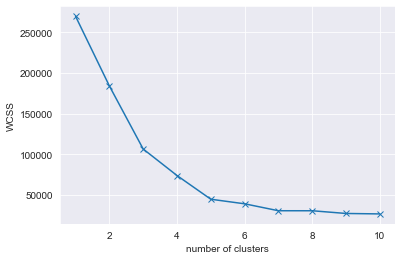

In [92]:
plt.plot(range(1, max_k), WCSS, marker='x')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [93]:
# visualize data points with k cluster
def kmean_clustering(points, optimal_k):
    i = 0
    centroids = kmean_init_centroid(points, optimal_k)
    for k in range(10):
        clusters = devide_into_clusters(points, centroids)
        #clusters = np.array([clusters[k] for k in clusters])
        new_centroids = update_centroids(clusters)
        if (centroids == new_centroids).all():
            break
        centroids = new_centroids
        i += 1
    for key in clusters:
        plt.scatter(np.array(clusters[key])[:, 1], np.array(clusters[key])[:, 2], s=20, alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=50)
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.legend([key for key in clusters])
    plt.show()
    print('Clusters has coverged at ', i)
    cluster3d = [cluster for cluster in clusters.values()]
    for key, cluster in clusters.items():
        cluster = np.array(cluster)
        cluster = cluster[cluster[:, 0].argsort()]
        print('cluster {}'.format(key), cluster)
    fig = plt.figure(figsize=(10,7))
    ax = plt.axes(projection='3d')
    for cluster in cluster3d:
        cluster = np.array(cluster)
        ax.scatter(cluster[:, 0], cluster[:, 1], cluster[:, 2])
    ax.set_xlabel('Age', fontweight ='bold')
    ax.set_ylabel('Annual Income', fontweight ='bold')
    ax.set_zlabel('Spending Score', fontweight ='bold')

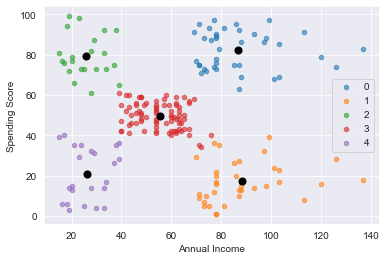

Clusters has coverged at  5
cluster 0 [[ 27  88  69]
 [ 27  78  89]
 [ 28 101  68]
 [ 28  87  75]
 [ 28  77  97]
 [ 29  79  83]
 [ 29  98  88]
 [ 29  73  88]
 [ 30  99  97]
 [ 30  88  86]
 [ 30  78  73]
 [ 30  78  78]
 [ 30 137  83]
 [ 31  70  77]
 [ 31  72  71]
 [ 31  81  93]
 [ 32  97  86]
 [ 32 103  69]
 [ 32  76  87]
 [ 32  75  93]
 [ 32 126  74]
 [ 32  77  74]
 [ 32  87  63]
 [ 32  73  73]
 [ 33  86  95]
 [ 34  78  90]
 [ 35  74  72]
 [ 35 120  79]
 [ 35  93  90]
 [ 36 103  85]
 [ 36  87  92]
 [ 36  85  75]
 [ 38  78  76]
 [ 38 113  91]
 [ 38  71  75]
 [ 39  71  75]
 [ 39  78  88]
 [ 39  69  91]
 [ 40  71  95]]
cluster 1 [[ 19  81   5]
 [ 19  74  10]
 [ 20  73   5]
 [ 23  70  29]
 [ 25  77  12]
 [ 32 137  18]
 [ 33 113   8]
 [ 34 103  23]
 [ 34  78  22]
 [ 34  78   1]
 [ 36  87  10]
 [ 36  87  27]
 [ 37  97  32]
 [ 37  78   1]
 [ 40  87  13]
 [ 41 103  17]
 [ 41  99  39]
 [ 42  86  20]
 [ 43  78  17]
 [ 44  78  20]
 [ 44  73   7]
 [ 45 126  28]
 [ 46  98  15]
 [ 47 120  16]
 [ 47 

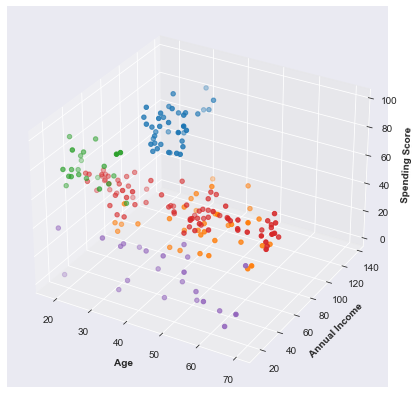

In [94]:
# visualize with optimal k = 5
kmean_clustering(points, 5)